In [1]:
import ipywidgets as widgets
from ipywidgets import interactive
from ipywidgets import Box

import matplotlib.pyplot as plt
import numpy as np
import math

from IPython.display import HTML
from IPython.display import IFrame

import builtins

In [2]:
file = builtins.open("Bilder/Logo.png", "rb")
image = file.read()
bild_Logo = widgets.Image(
    value=image,
    format='png',
    width=200,
   #height=128,
    )
bild_Logo

A Jupyter Widget

# <span style="font-family:Century Gothic;color:DarkCyan">Arbeitspaket 11</span>

# <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 1</span>

### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 1.1: Umfrageexperiment</span>

<a href="https://direct.mit.edu/rest/article/99/2/201/58387/Richer-and-Holier-Than-Thou-The-Effect-of-Relative">Karadja, Mollerstrom und Seim (2017)</a> untersuchen den Einfluss der Einkommensposition auf die Umverteilungspräferenzen empirisch. Hierfür informieren sie die Individuen über ihre tatsächliche Position in der Einkommensverteilung. Nehmen Sie im Folgenden an, Sie seien ein alleinstehendes Individuum mit einem Nettoeinkommen von 19.464€ im Jahr. 

Bitte beantworten Sie die folgende Frage aus der Umfrage von Karadja, Mollerstrom und Seim (2017).
***
*Stellen Sie sich vor, das Einkommen aller Menschen in Deutschland würde auf einer Skala von 1 bis 10 aufgeteilt wobei 1 das geringste und 10 das höchste Einkommen darstellt.*

> ***Welche relative Einkommensposition erwarten Sie mit einem Einkommen von 19.464€ im Jahr?***

In [3]:
scale_KMS = widgets.IntSlider(
    value=5,
    min=1,
    max=10,
    step=1,
    description='Skala',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d'
)

display(scale_KMS)

A Jupyter Widget

***
Nach Beantwortung dieser Frage wird die Hälfte der Teilnehmer des Umfrageexperiments über ihre tatsächliche Position in der Einkommensverteilung informiert.

> **Machen Sie sich mit dem Umfragedesign vertraut und schauen Sie sich im Anschluss die Reiter für Behandlungs- und Kontrollgruppe an.**


In [4]:
## Bilder einfügen
file = builtins.open("Bilder/Design.png", "rb")
image = file.read()
bild_Design = widgets.Image(
    value=image,
    format='png',
    #width=128,
    #height=128,
    )
bild_Design

## Bilder einfügen
file = builtins.open("Bilder/Info_2.png", "rb")
image = file.read()
bild_T = widgets.Image(
    value=image,
    format='png',
    #width=128,
    #height=128,
    )
bild_T

gruppe_K = widgets.Label(
        value="Keine weiteren Informationen.",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    )
gruppe_K


tab_nest = widgets.Tab()
tab_nest.children = [bild_Design,bild_T,gruppe_K]
tab_nest.set_title(0, 'Umfragedesign')
tab_nest.set_title(1, 'Behandlungsgruppe')
tab_nest.set_title(2, 'Kontrollgruppe')
tab_nest


A Jupyter Widget

### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 1.2: Wahrgenommene vs. tatsächliche Position in der Einkommensverteilung</span>

Anhand der untenstehenden Grafik können Sie sehen, inwieweit Ihre wahrgenommene relative Einkommensposition $W$ von der tatsächlichen Position $Y$ in der Einkommensverteilung abweicht.

> **Nutzen Sie zunächst den Slider, um Ihren geschätzten Wert aus Aufgabe 1.1 einzustellen. Nutzen Sie dann den Slider, um den Wert für ein Individuum einzustellen, das seine tatsächliche Position überschätzt hat. Nutzen Sie im Anschluss den Slider, um den Wert für ein Individuum einzustellen, das seine Position korrekt eingeschätzt hat.**

In [5]:
%matplotlib inline

def f(W):
    plt.figure(2)
    y = [3]
    z= [0,10]
    v= [0,10]
    plt.plot(z,v,color="Darkcyan", alpha=0.5)
    plt.scatter(y,W,color="Darkcyan")
    plt.ylim(0, 10)
    plt.xlim(0, 10)
    plt.xlabel("Tatsächliche Einkommensposition $Y$")
    plt.margins(x=0)
    plt.ylabel("Wahrgenommene Einkommensposition $W$")    
    plt.show()

    
interactive_plot = interactive(f, W=(0, 10, 1))
output = interactive_plot.children[-1]
interactive_plot

A Jupyter Widget

# <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 2</span>

Die Studie von Verho, Hämäläinen und Kanninen (2022) untersucht, wie sich das bedingungslose Grundeinkommen auf das Arbeitsmarktangebot von Arbeitslosen auswirkt. 

Zufällig ausgewählte Arbeitslose in Finnland wurden in eine Behandlungs- und in eine Kontrollgruppe aufgeteilt. Individuen in der Behandlungsgruppe wurde ab Januar 2017 zwei Jahre lang ein steuerfreier Betrag in Höhe von 560€/Monat ausgezahlt. **Abbildung 1** stellt die Ergebnisse der Studie dar.

In [6]:
## Bilder einfügen
file = builtins.open("Bilder/Abbildung1_BGE.PNG", "rb")
image = file.read()
bild = widgets.Image(
    value=image,
    format='png',
    #width=1000,
    #height=600,
    )
bild

A Jupyter Widget

**Abbildung 1**: Anteil an Individuen, die im betrachteten Zeitraum gearbeitet haben. Quelle: Verho et al. (2022).

> **Welche Gruppe erhöht ihr Arbeitsangebot über den betrachteten Zeitraum?**

In [7]:
opinion_empiric = widgets.RadioButtons(
    options=['Die Behandlungsgruppe','Die Kontrollgruppe', 'Beide Gruppen', 'Keine Aussage möglich'],
    value=None,
    description='',
    disabled=False,
)

button_empiric = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)


# define function
def check(button_instance):
  if opinion_empiric.value == 'Beide Gruppen':
    button_empiric.button_style = 'success'
    button_empiric.description = 'Richtig!'
  else:
    button_empiric.button_style = 'danger'
    button_empiric.description = 'Leider falsch.'

# set function as on_click on button
button_empiric.on_click(check)


In [8]:
#items = [opinion_final, button_final]
#box_final = Box(children=items)
#display(box_final) # <- this one command displays all children

display(opinion_empiric)
display(button_empiric)

A Jupyter Widget

A Jupyter Widget

> **Was können mögliche Gründe für den beobachteten Anstieg im Arbeitsangebot sein?**

Diese Frage wird im Rahmen der Präsenzveranstaltung beantwortet.

> **In welchem Zeitraum ist die Wirkung des Grundeinkommens auf das Arbeitsangebot stärker?**

In [9]:
opinion_empiric2 = widgets.RadioButtons(
    options=['Im ersten Jahr nach der Intervention','Im zweiten Jahr nach der Intervention', 'Keine Aussage möglich'],
    value=None,
    description='',
    disabled=False,
)

button_empiric2 = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)


# define function
def check(button_instance):
  if opinion_empiric2.value == 'Im zweiten Jahr nach der Intervention':
    button_empiric2.button_style = 'success'
    button_empiric2.description = 'Richtig!'
  else:
    button_empiric2.button_style = 'danger'
    button_empiric2.description = 'Leider falsch.'

# set function as on_click on button
button_empiric2.on_click(check)

In [10]:
#items = [opinion_final, button_final]
#box_final = Box(children=items)
#display(box_final) # <- this one command displays all children

display(opinion_empiric2)
display(button_empiric2)

A Jupyter Widget

A Jupyter Widget

> **Kann man anhand von Abbildung 1 die Schlussfolgerung ziehen, dass ein bedingungsloses Grundeinkommen für alle Finnen positive Auswirkungen auf das Arbeitsangebot hätte?**

In [11]:
opinion_empiric3 = widgets.RadioButtons(
    options=['Ja','Nein'],
    value=None,
    description='',
    disabled=False,
)

button_empiric3 = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)


# define function
def check(button_instance):
  if opinion_empiric3.value == 'Nein':
    button_empiric3.button_style = 'success'
    button_empiric3.description = 'Richtig!'
  else:
    button_empiric3.button_style = 'danger'
    button_empiric3.description = 'Leider falsch.'

# set function as on_click on button
button_empiric3.on_click(check)

In [12]:
#items = [opinion_final, button_final]
#box_final = Box(children=items)
#display(box_final) # <- this one command displays all children

display(opinion_empiric3)
display(button_empiric3)

A Jupyter Widget

A Jupyter Widget

> **Betrachten Sie den Zeitraum vor Beginn des Experimentes. Sind Unterschiede zwischen Behandlungs- und Kontrollgruppe in diesem Zeitraum beobachtbar?**

In [13]:
opinion_empiric4 = widgets.RadioButtons(
    options=['Ja','Nein', 'Keine Aussage möglich'],
    value=None,
    description='',
    disabled=False,
)

button_empiric4 = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)


# define function
def check(button_instance):
  if opinion_empiric4.value == 'Nein':
    button_empiric4.button_style = 'success'
    button_empiric4.description = 'Richtig!'
  else:
    button_empiric4.button_style = 'danger'
    button_empiric4.description = 'Leider falsch.'

# set function as on_click on button
button_empiric4.on_click(check)

In [14]:
#items = [opinion_final, button_final]
#box_final = Box(children=items)
#display(box_final) # <- this one command displays all children

display(opinion_empiric4)
display(button_empiric4)

A Jupyter Widget

A Jupyter Widget

> **Wie ist dies hinsichtlich der Validität der Studie zu bewerten?**

Diese Frage wird im Rahmen der Präsenzveranstaltung beantwortet.

**Abbildung 2** stellt die Differenz zwischen dem Arbeitsangebot der Behandlungs- und der Kontrollgruppe im Zeitverlauf dar.

In [15]:
## Bilder einfügen
file = builtins.open("Bilder/Abbildung2_BGE.PNG", "rb")
image = file.read()
bild = widgets.Image(
    value=image,
    format='png',
    #width=1000,
    #height=600,
    )
bild

A Jupyter Widget

**Abbildung 2**: Differenz zwischen dem Arbeitsangebot der Behandlungsgruppe (T) und der Kontrollgruppe (C) über den betrachteten Zeitraum. Quelle: Verho, Hämäläinen and Kanninen (2022).

>**Die Autoren interpretieren diese Grafik als Nachweis für fehlende statistische Signifikanz des Behandlungseffektes. Was ist der Grund dafür?**

In [16]:
opinion_empiric5 = widgets.RadioButtons(
    options=['Die Differenz (T - C) ist teilweise negativ','Viele Konfidenzintervalle beinhalten den Wert 0', 'Kein eindeutig positiver Trend ist erkennbar'],
    value=None,
    description='',
    disabled=False,
)

button_empiric5 = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)


# define function
def check(button_instance):
  if opinion_empiric5.value == 'Viele Konfidenzintervalle beinhalten den Wert 0':
    button_empiric5.button_style = 'success'
    button_empiric5.description = 'Richtig!'
  else:
    button_empiric5.button_style = 'danger'
    button_empiric5.description = 'Leider falsch.'

# set function as on_click on button
button_empiric5.on_click(check)

In [17]:
#items = [opinion_final, button_final]
#box_final = Box(children=items)
#display(box_final)# <- this one command displays all children

display(opinion_empiric5)
display(button_empiric5)

A Jupyter Widget

A Jupyter Widget

## <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 3</span>

Gegeben sei ein Individuum, das Nutzen aus Freizeit $f$ und Konsum $x$ zieht (Preis $p = 1$). Die
Nutzenfunktion sei mit $u = u(f, x)$ gegeben. Das Individuum bietet einen prozentualen
Anteil $l$ seines Zeitbudgets zum Lohnsatz $w = 1$ auf dem Arbeitsmarkt an.

> **Welcher Ausdruck beschreibt das Zeitbudget des Individuums?**

In [18]:
opinion_MR = widgets.RadioButtons(
    options=['F=100','l+f=1','l=f'],
    value=None,
    #description='Faktoren',
    disabled=False
)

button_MR = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)

# define function
def check(button_MR):
  if opinion_MR.value == 'l+f=1':
    button_MR.button_style = 'success'
    button_MR.description = 'Richtig'
  else:
    button_MR.button_style = 'danger'
    button_MR.description = 'Leider Falsch'

# set function as on_click on button
button_MR.on_click(check)

display(opinion_MR)
display(button_MR)

A Jupyter Widget

A Jupyter Widget

Der Staat beschließt die Einführung eines <a href="https://www.bpb.de/themen/medien-journalismus/netzdebatte/222285/debatte-bedingungsloses-grundeinkommen/">bedingungslosen Grundeinkommens $G$</a>. Zusätzlich zu ihrem Arbeitseinkommen erhalten alle Individuen ab sofort ein exogen gegebenes Nicht-Arbeitseinkommen $G$.

> **Skizzieren Sie in untenstehender Abbildung die Budgetgerade des Individuums für ein Grundeinkommen in Höhe von $G=0,25$ und $G=0,50$. Überprüfen Sie Ihr Ergebnis mit dem Slider.**

In [19]:
%matplotlib inline

def f(G):
    plt.figure(2)
    x = np.linspace(0, 1)
    plt.plot(x,(1+G)-1*x,color="Darkcyan", alpha=0.5, linewidth=2.0)
    plt.vlines(1, 0, G,color="Darkcyan", alpha=0.5, linewidth=2.0)
    plt.ylim(0, 2)
    plt.xlim(0, 1.1)
    plt.xlabel("Freizeit $f$")
    plt.margins(x=0)
    plt.ylabel("Konsum $x$")    
    plt.show()

    
interactive_plot = interactive(f, G=widgets.FloatSlider(min=0,max=1,step=0.01,value=0))
output = interactive_plot.children[-1]
interactive_plot

A Jupyter Widget

> **Stellen Sie das Optimierungsproblem des Individuums sowie die dazugehörige Lagrange-Funktion auf.**

In [20]:
accordion1 = widgets.Accordion([
    widgets.Label(
        value="$$ wl + G = px $$",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    ),
    widgets.Label(
        value="$$ max \\, u(f,x) \\quad u.d.NB.\\quad  wl + G = px $$",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    ),
    widgets.Label(
        value="$$ \mathcal{L} = u(f,x) + \lambda(w(1-f) + G - px) $$",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    )], selected_index=None)
accordion1.set_title(0, 'Budgetbeschränkung')
accordion1.set_title(1, 'Optimierungsproblem')
accordion1.set_title(2, 'Lagrange-Funktion')

accordion1

A Jupyter Widget

> **Bestimmen Sie die Optimalitätsbedingungen und interpretieren Sie diese.**

In [21]:
accordion2 = widgets.Accordion([
    widgets.Label(
        value="BEO 1: $$\\frac{\partial \mathcal{L}}{\partial f}=\\frac{\partial u}{\partial f}-\lambda w\\overset{!}{=}0$$ BEO 2: $$\\frac{\partial\mathcal{L}}{\partial x}= \\frac{\partial u}{\partial x}-\lambda p\overset{!}{=}0$$ BEO 3: $$\\frac{\partial \mathcal {L}}{\partial \lambda}=w(1-f)+G-px\overset{!}{=}0$$",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    ),
    widgets.Label(
        value="$$ \\text{(1)}=\\text{(2)}:~ \\frac{\partial u}{\partial f}\cdot\\frac{1}{w}=\\frac{\partial u}{\partial x}\cdot\\frac{1}{p} $$",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    ),
    widgets.Label(
        value="$$\\frac{\\frac{\partial u}{\partial f}}{\\frac{\partial u}{\partial x}}=\\frac{w}{p}$$",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    ),
    widgets.Label(
        value="|GRS|  = relatives Preisverhältnis für Konsum und Freizeit bzw. (|Steigung Indifferenzkurve|)=(|Steigung Budgetrestriktion|)",
        placeholder='Some LaTeX',
        description='Some LaTeX',
        disabled=False
    )], selected_index=None)
    
accordion2.set_title(0, 'Bedingungen Erster Ordnung')
accordion2.set_title(1, 'Gleichsetzen')
accordion2.set_title(2, 'Optimalitätsbedingung')
accordion2.set_title(3, 'Interpretation')

accordion2

A Jupyter Widget

## <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 4: Anrechnung Arbeitseinkommen </span>

Die Regierung beschließt die Einführung des sogenannten Bürgergelds. Dieses Konzept sieht vor, dass Individuen ohne Arbeitseinkommen die Transferzahlung $G=60$ erhalten. Wird ein Individuum am Arbeitsmarkt aktiv, soll sein Arbeitseinkommen auf die Transferzahlung angerechnet werden. Die beiden aktiven Regierungsparteien sind sich uneinig, in welchem Ausmaß diese Anrechnung erfolgen soll. 

- **<span style="color:DarkCyan">Partei A</span>**  möchte, dass das Arbeitseinkommen voll angerechnet wird.
- **<span style="color:Maroon">Partei B</span>** möchte, dass das Arbeitseinkommen nur zu 80% angerechnet wird.

> **Skizzieren Sie den Verlauf der Budgetgeraden für die Vorschläge der <span style="color:DarkCyan">Partei A</span> und <span style="color:Maroon">Partei B</span>. Überprüfen Sie Ihr Ergebnis im Anschluss mit Hilfe der Slider <span style="color:DarkCyan">A</span> und <span style="color:Maroon">B</span>.** Gehen Sie davon aus, dass das maximale Zeitbudget 100 Stunden pro Woche beträgt. Für jede Arbeitsstunde erhält das Individuum einen Stundenlohn von $w=1$. Eine Einheit Konsum kostet $p=1$.


In [22]:
%matplotlib inline

def f(A,B):
    plt.figure(2)
    x = np.linspace(1, 100, num=100)
    # Funktionen ohne Steuern
    plt.plot(x,100-x,color="#464646", linestyle='dotted')
    # Funktion mit voller Anrechnung    
    x1 = [0,40,100]
    y1 = [100,60,60]
    plt.plot(A*x1,A*y1,color="Darkcyan", linewidth=2.0)
    plt.vlines(100, 0,A*60,color="Darkcyan", linewidth=2.0)
    # Funktion mit 80 Anrechnung
    x2 = [0,25,100]
    y2 = [100,75,60]
    plt.plot(B*x2,B*y2,color="Maroon", linewidth=2.0)
    plt.vlines(100, 0,B*60,color="Maroon", linewidth=2.0)
    
    # Settings
    plt.ylim(0, 100)
    plt.xlim(0, 110)
    plt.xlabel("Freizeit $f$")
    plt.margins(x=0)
    plt.ylabel("Konsum $x$")    
    plt.show()
    
    
interactive_plot = interactive(f, A=(0, 1,1), B=(0, 1,1))
output = interactive_plot.children[-1]
interactive_plot

A Jupyter Widget

## <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 5

<a href="https://www.sciencedirect.com/science/article/pii/S0304407607001182">Lemieux und Milligan (2008)</a>  untersuchen die Auswirkung eines Sozialhilfeprogramms auf das Arbeitsangebot von Individuen in Quebec (Kanada).

### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 5.1</span>
> **Auf welche Gruppe alleinstehender Männer mit einem Alter zwischen 25 und 39 Jahren konzentrieren sich die Autoren?**

In [23]:
opinion_MR1 = widgets.RadioButtons(
    options=['Mit High-School Abschluss und mit Kindern','Ohne High-School Abschluss und mit Kindern','Ohne High-School Abschluss, ohne Kindern'],
    value=None,
    #description='Faktoren',
    disabled=False
)

button_MR1 = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)

# define function
def check(button_MR1):
  if opinion_MR1.value == 'Ohne High-School Abschluss, ohne Kindern':
    button_MR1.button_style = 'success'
    button_MR1.description = 'Richtig'
  else:
    button_MR1.button_style = 'danger'
    button_MR1.description = 'Leider Falsch'

# set function as on_click on button
button_MR1.on_click(check)

display(opinion_MR1)
display(button_MR1)

A Jupyter Widget

A Jupyter Widget

### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 5.2</span>
Zeichnen Sie die Höhe der zu erwartenden Sozialhilfe (siehe Folie 329) für diese Gruppe in untenstehendes Diagramm ein.

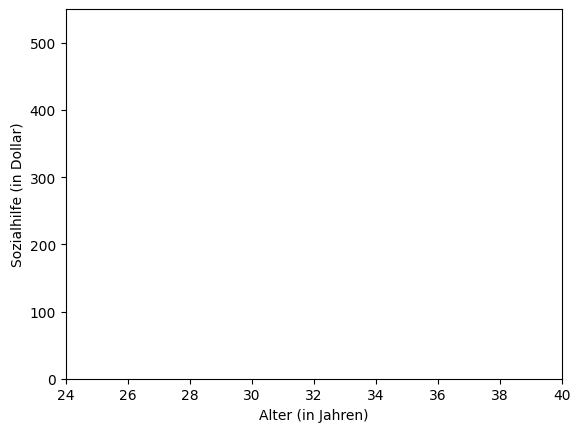

In [24]:
%matplotlib inline

#def f(A,B):
plt.figure(2)
x = np.linspace(1, 100, num=100)
# Benefits unter 30   
#x1 = [24,30]
#y1 = [185,185]
#plt.plot(x1,y1,color="Darkcyan", linewidth=2.0)
#plt.vlines(30,185,507, color="#464646", linestyle='dotted', linewidth=2.0)
# Benefits über 30 
#x2 = [30,40]
#y2 = [507,507]
#plt.plot(x2,y2,color="Darkcyan", linewidth=2.0)

    
# Settings
plt.ylim(0, 550)
plt.xlim(24, 40)
plt.xlabel("Alter (in Jahren)")
plt.margins(x=0)
plt.ylabel("Sozialhilfe (in Dollar)")    
plt.show()


### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 5.3</span>
>**Wieso vergleichen Lemieux und Milligan innerhalb dieser Gruppe nicht alle Personen unter 30 Jahren mit allen Personen über 30 Jahren?**

*Diese Aufgabe wird in der Präsenzveranstaltung besprochen.*

### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 5.4</span>
Betrachten Sie nun folgende Abbildung aus Lemieux und Milligan (S. 816).

In [25]:
file = builtins.open("Bilder/Lemieux2008_Abbildung_3_S816.PNG", "rb")
image = file.read()
bild_Lemieux2008_1 = widgets.Image(
    value=image,
    format='png',
    width=700,
   #height=128,
    )
bild_Lemieux2008_1

A Jupyter Widget

>**Wie groß ist der Effekt der erhöhten Sozialhilfe auf die Beschäftigtenrate?**

In [26]:
opinion_MR2 = widgets.RadioButtons(
    options=['ca. -5 Prozent','ca. -5 Prozentpunkte','ca. +5Prozent','ca. +5 Prozentpunkte'],
    value=None,
    #description='Faktoren',
    disabled=False
)

button_MR2 = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)

# define function
def check(button_MR2):
  if opinion_MR2.value == 'ca. -5 Prozentpunkte':
    button_MR2.button_style = 'success'
    button_MR2.description = 'Richtig'
  else:
    button_MR2.button_style = 'danger'
    button_MR2.description = 'Leider Falsch'

# set function as on_click on button
button_MR2.on_click(check)

display(opinion_MR2)
display(button_MR2)

A Jupyter Widget

A Jupyter Widget

### <span style="font-family:Century Gothic;color:DarkCyan">Aufgabe 5.5</span>
>**Lassen sich die Schlussfolgerungen aus der Studie auf alle Männer im Alter zwischen 30 und 31 Jahren übertragen? Bitte begründen Sie Ihre Antwort.**

In [27]:
opinion_MR3 = widgets.RadioButtons(
    options=['Ja','Nein'],
    value=None,
    #description='Faktoren',
    disabled=False
)

button_MR3 = widgets.Button(
    description='Auswertung',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Bitte klicken.',
    #icon='check' # (FontAwesome names without the `fa-` prefix)
)

# define function
def check(button_MR3):
  if opinion_MR3.value == 'Nein':
    button_MR3.button_style = 'success'
    button_MR3.description = 'Richtig'
  else:
    button_MR3.button_style = 'danger'
    button_MR3.description = 'Leider Falsch'

# set function as on_click on button
button_MR3.on_click(check)

display(opinion_MR3)
display(button_MR3)

A Jupyter Widget

A Jupyter Widget